# Random

In [1]:
import random

In [2]:
# random decimal between 0 and 1
random.random()

0.5579594117881912

In [3]:
# random whole number divisible by step-increment within range
random.randrange(-90,90,step=5)

-35

In [4]:
# random whole number within range
random.randint(-90,90)

64

In [5]:
# random decimal within range
random.uniform(-90,90)

68.74081983264179

In [6]:
# creates a list of 10 random latitude points between -90 and 89

x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
    
latitudes

[-41.77343127280975,
 -76.78195793881522,
 79.31450157457951,
 -11.157136888363103,
 -38.18736693301277,
 26.634770106586984,
 -48.77671913255877,
 -23.33311120098426,
 81.01641350916542,
 -41.471035542014704]

In [7]:
# Import the NumPy module.
import numpy as np

In [8]:
# creates (size) array of random decimals within range
np.random.uniform(-90,90, size=50)

array([-76.13104739,  -8.9605106 , -37.09493765, -48.14167605,
       -84.19536274, -33.62128709, -15.02282179,  50.12061612,
       -49.32255351,  42.00686696,  41.78147304, -24.63843072,
       -48.84182618,  20.90964008,   8.19451466, -55.931819  ,
        66.9693612 , -82.6654373 ,  57.16469269,  -6.03835975,
       -87.04762579,  12.70135193,  29.97168347,   2.89000894,
       -35.91767866,  15.54038301,   5.07015265, -57.89706995,
       -85.87757971, -85.34689809, -12.80743398, -19.54820252,
        65.87435626, -47.66452957, -79.62427023,  83.96526188,
       -53.62123912,   6.1674973 ,  71.73292506, -13.58318718,
        64.55501369, -72.25233376,  -6.06498659,  -7.84792422,
        43.81563231,  60.9681126 ,  13.56413904, -68.56539115,
        71.90952633,   2.47104509])

In [9]:
# Import timeit.
import timeit

In [10]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

22.9 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

# Call the function with 1500.
%timeit latitudes(1500)

3.25 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Create Lat and Long combinations

In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Practice

In [14]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


# API Practice

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# Make an API Call

In [2]:
weather_api_key="84e1c688221197e1cbe08170c34b34ae"

In [4]:
# Import the requests library.
import requests

# Import the API key.
#from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Austin"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=84e1c688221197e1cbe08170c34b34ae&q=Austin


In [7]:

weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [8]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
weather_json.get("main")

{'temp': 70.29,
 'feels_like': 71.1,
 'temp_min': 67.71,
 'temp_max': 72.84,
 'pressure': 1018,
 'humidity': 87}

In [25]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [26]:
#status code
city_weather.status_code

200

In [27]:
# Create an endpoint URL for a city. ERROR 404
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [28]:
# Create an endpoint URL for a city. FIXED
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [29]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":85.03,"feels_like":89.29,"temp_min":73.65,"temp_max":92.79,"pressure":1015,"humidity":60},"visibility":10000,"wind":{"speed":4,"deg":135,"gust":7},"clouds":{"all":2},"dt":1653229311,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1653210996,"sunset":1653264332},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [30]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.03,
  'feels_like': 89.29,
  'temp_min': 73.65,
  'temp_max': 92.79,
  'pressure': 1015,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 135, 'gust': 7},
 'clouds': {'all': 2},
 'dt': 1653229311,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653210996,
  'sunset': 1653264332},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Handle Request Errors

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


# Parse a Response

In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.03,
  'feels_like': 89.29,
  'temp_min': 73.65,
  'temp_max': 92.79,
  'pressure': 1015,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 135, 'gust': 7},
 'clouds': {'all': 2},
 'dt': 1653229311,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653210996,
  'sunset': 1653264332},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [33]:
# Get the JSON data.
boston_data = city_weather.json()

In [34]:
boston_data['coord']['lat']

42.3584

In [35]:
boston_data['main']['temp_max']

92.79

In [36]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]

print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 92.79 60 2 4


# Convert the Date Timestamp

In [37]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-05-22 14:21:51'

# More

# Get City Weather Data

In [11]:
# Import the time library and the datetime module from the datetime library 
# Import the dependencies.
import os  ## needed to change dir to import keys from different folder
import requests  ## needed for web crawls 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import time

In [12]:
#from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations.
# chain np and random 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) ## packs both variables into a tupled zip file
lat_lngs # show me the zip file

In [14]:
# add longs and lats to a coordinates list
coordinates = list(lat_lngs) #write the zip file into a list, so you can work with it

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [17]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): 
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | turayf
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | aswan
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | berberati
Processing Record 6 of Set 1 | helong
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | tilichiki
Processing Record 12 of Set 1 | burewala
Processing Record 13 of Set 1 | voznesenye
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | beneditinos
Processing Record 16 of Set 1 | zhoukou
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tongliao
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | chabahar
Processing Record 23 of Set 1 | mataura
Processing Record 24 of Set 1 | vozhega
Processing Record 25 of

Processing Record 39 of Set 4 | noumea
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | ous
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | doda
Processing Record 46 of Set 4 | jalingo
Processing Record 47 of Set 4 | mao
Processing Record 48 of Set 4 | mahibadhoo
Processing Record 49 of Set 4 | plettenberg bay
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | mana
Processing Record 3 of Set 5 | ambulu
Processing Record 4 of Set 5 | ojinaga
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | bonavista
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | chadiza
Processing Record 9 of Set 5 | gat
Processing Record 10 of Set 5 | santo antonio do ica
Processing Record 11 of Set 5 | san quintin
Processing Record 12 of Set 5 | westport
Pro

Processing Record 27 of Set 8 | hokitika
Processing Record 28 of Set 8 | henties bay
Processing Record 29 of Set 8 | avera
Processing Record 30 of Set 8 | bereda
Processing Record 31 of Set 8 | licata
Processing Record 32 of Set 8 | mildura
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | asyut
Processing Record 35 of Set 8 | aybak
City not found. Skipping...
Processing Record 36 of Set 8 | yarim
Processing Record 37 of Set 8 | anloga
Processing Record 38 of Set 8 | tanabe
Processing Record 39 of Set 8 | houma
Processing Record 40 of Set 8 | adrar
Processing Record 41 of Set 8 | landang
City not found. Skipping...
Processing Record 42 of Set 8 | cepu
Processing Record 43 of Set 8 | klaksvik
Processing Record 44 of Set 8 | boyolangu
Processing Record 45 of Set 8 | terrak
Processing Record 46 of Set 8 | yermekeyevo
Processing Record 47 of Set 8 | lang suan
Processing Record 48 of Set 8 | shiyan
Processing Record 49 of Set 8 | cockburn town
Processing Record 50 of S

Processing Record 16 of Set 12 | mayor pablo lagerenza
Processing Record 17 of Set 12 | tarime
Processing Record 18 of Set 12 | ilo
Processing Record 19 of Set 12 | kieta
Processing Record 20 of Set 12 | krasnokamensk
Processing Record 21 of Set 12 | walvis bay
Processing Record 22 of Set 12 | fare
Processing Record 23 of Set 12 | nioro
Processing Record 24 of Set 12 | atlantic city
Processing Record 25 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 26 of Set 12 | bodden town
Processing Record 27 of Set 12 | karasjok
Processing Record 28 of Set 12 | kyren
Processing Record 29 of Set 12 | poso
Processing Record 30 of Set 12 | lugovskiy
City not found. Skipping...
Processing Record 31 of Set 12 | mannarakkat
Processing Record 32 of Set 12 | havoysund
Processing Record 33 of Set 12 | mahon
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | mirnyy
Processing Record 36 of Set 12 | fujin
Processing Record 37 of Set 12 | jabinyanah
Process

# Create a DataFrame of City Weather Data

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turayf,31.6725,38.6637,77.85,21,0,23.35,SA,2022-05-23 15:04:33
1,Constitucion,-35.3333,-72.4167,54.16,91,100,0.87,CL,2022-05-23 15:04:33
2,Aswan,24.0934,32.9070,93.63,9,0,17.65,EG,2022-05-23 15:04:34
3,Ancud,-41.8697,-73.8203,49.17,77,89,17.29,CL,2022-05-23 15:04:28
4,Berberati,4.2612,15.7922,79.16,67,91,4.29,CF,2022-05-23 15:04:34
5,Helong,42.5397,128.9972,57.56,92,100,5.70,CN,2022-05-23 15:04:34
6,Butaritari,3.0707,172.7902,81.27,80,100,12.75,KI,2022-05-23 15:04:34
7,Puerto Ayora,-0.7393,-90.3518,78.76,96,47,1.99,EC,2022-05-23 15:04:35
8,Dikson,73.5069,80.5464,21.72,83,8,9.62,RU,2022-05-23 15:04:35
9,Rikitea,-23.1203,-134.9692,75.58,77,15,13.71,PF,2022-05-23 15:02:31


In [23]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turayf,SA,2022-05-23 15:04:33,31.6725,38.6637,77.85,21,0,23.35
1,Constitucion,CL,2022-05-23 15:04:33,-35.3333,-72.4167,54.16,91,100,0.87
2,Aswan,EG,2022-05-23 15:04:34,24.0934,32.9070,93.63,9,0,17.65
3,Ancud,CL,2022-05-23 15:04:28,-41.8697,-73.8203,49.17,77,89,17.29
4,Berberati,CF,2022-05-23 15:04:34,4.2612,15.7922,79.16,67,91,4.29
5,Helong,CN,2022-05-23 15:04:34,42.5397,128.9972,57.56,92,100,5.70
6,Butaritari,KI,2022-05-23 15:04:34,3.0707,172.7902,81.27,80,100,12.75
7,Puerto Ayora,EC,2022-05-23 15:04:35,-0.7393,-90.3518,78.76,96,47,1.99
8,Dikson,RU,2022-05-23 15:04:35,73.5069,80.5464,21.72,83,8,9.62
9,Rikitea,PF,2022-05-23 15:02:31,-23.1203,-134.9692,75.58,77,15,13.71


In [24]:
# Create the output file (CSV) in the weather_data folder.
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1653319207.9553273

In [27]:
# Get today's date in mo/day/year format
today_date = time.strftime("%x")
today_date

'05/23/22'

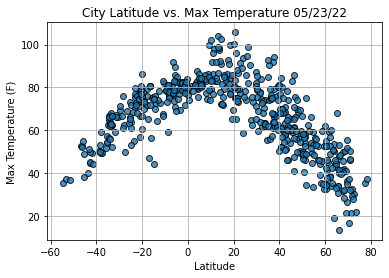

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

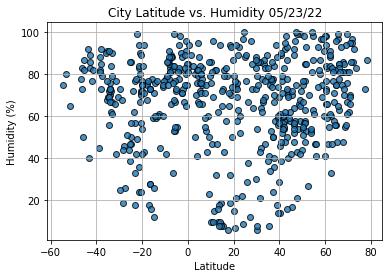

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

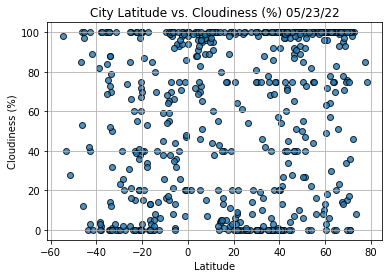

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

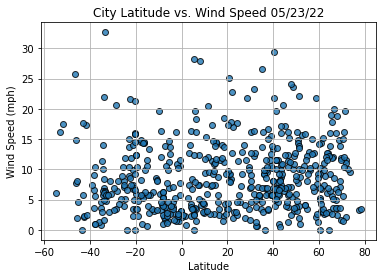

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression

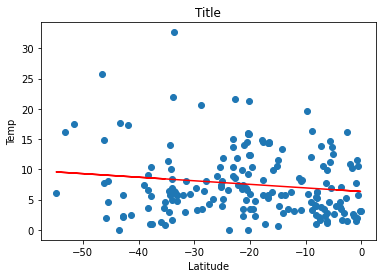

In [86]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('Title')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# Northern Hemi Data

In [37]:
index13 = city_data_df.loc[13]
index13

City                        Alofi
Country                        NU
Date          2022-05-23 15:04:36
Lat                      -19.0595
Lng                     -169.9187
Max Temp                    69.69
Humidity                       94
Cloudiness                     40
Wind Speed                    2.3
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Turayf,SA,2022-05-23 15:04:33,31.6725,38.6637,77.85,21,0,23.35
2,Aswan,EG,2022-05-23 15:04:34,24.0934,32.9070,93.63,9,0,17.65
4,Berberati,CF,2022-05-23 15:04:34,4.2612,15.7922,79.16,67,91,4.29
5,Helong,CN,2022-05-23 15:04:34,42.5397,128.9972,57.56,92,100,5.70
6,Butaritari,KI,2022-05-23 15:04:34,3.0707,172.7902,81.27,80,100,12.75


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

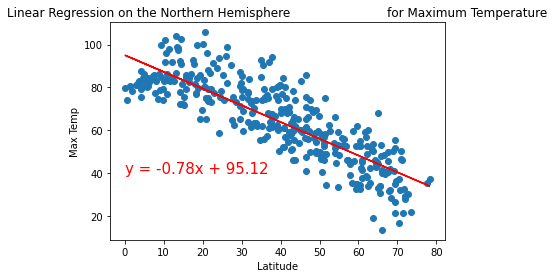

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,40))

# Southern Hemi Data

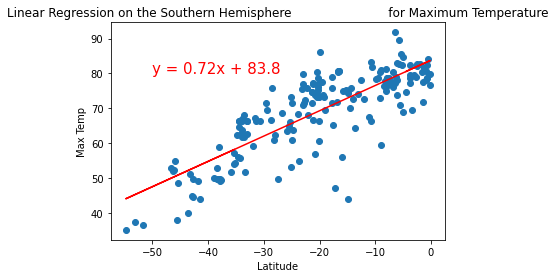

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

# Correlation between Lat and %Hum

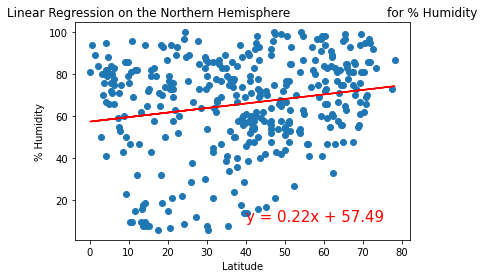

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

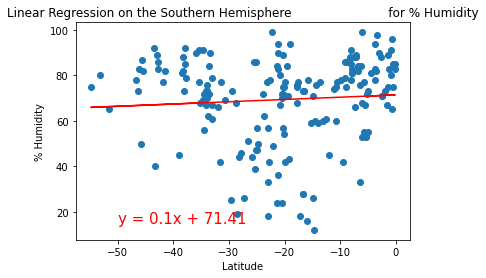

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Correlation between Lat and %Cloud

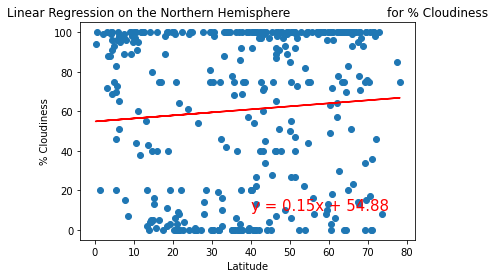

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

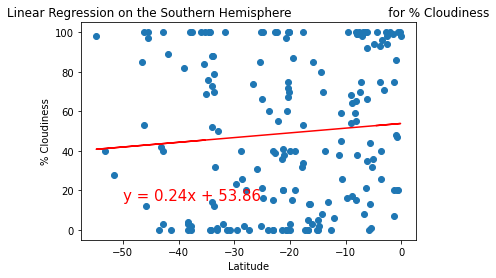

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

# Correlation between Lat and Wind Speed

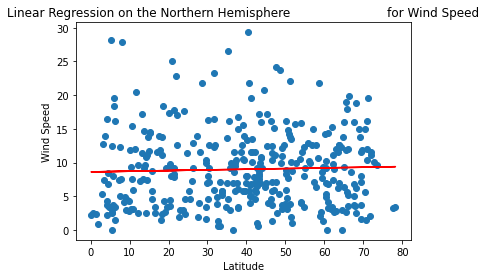

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

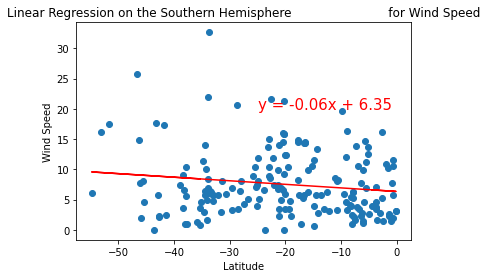

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25, 20))

# Max Temp Heat Map

In [2]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

In [3]:
%matplotlib inline

In [4]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Turayf,SA,2022-05-23 15:04:33,31.6725,38.6637,77.85,21,0,23.35
1,1,Constitucion,CL,2022-05-23 15:04:33,-35.3333,-72.4167,54.16,91,100,0.87
2,2,Aswan,EG,2022-05-23 15:04:34,24.0934,32.9070,93.63,9,0,17.65
3,3,Ancud,CL,2022-05-23 15:04:28,-41.8697,-73.8203,49.17,77,89,17.29
4,4,Berberati,CF,2022-05-23 15:04:34,4.2612,15.7922,79.16,67,91,4.29


In [5]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [6]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [8]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
                        
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)


# 5. Add the heatmap layer.
fig.add_layer(heat_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Adjust Heat Map Zoom

In [9]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
#max_temp = city_data_df["Max Temp"]
#temps = []
#for temp in max_temp:
#    temps.append(max(temp, 0))
                        
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heat_layer = gmaps.heatmap_layer(locations, weights=temps)

heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)


# 5. Add the heatmap layer.
fig.add_layer(heat_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Percent Humidity HeatMap

In [10]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Percent Cloudiness HeatMap

In [17]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Wind Speed HeatMap

In [19]:
# Heatmap of Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Vacation Criteria

In [34]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [35]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Turayf,SA,2022-05-23 15:04:33,31.6725,38.6637,77.85,21,0,23.35
4,4,Berberati,CF,2022-05-23 15:04:34,4.2612,15.7922,79.16,67,91,4.29
6,6,Butaritari,KI,2022-05-23 15:04:34,3.0707,172.7902,81.27,80,100,12.75
7,7,Puerto Ayora,EC,2022-05-23 15:04:35,-0.7393,-90.3518,78.76,96,47,1.99
9,9,Rikitea,PF,2022-05-23 15:02:31,-23.1203,-134.9692,75.58,77,15,13.71
11,11,Burewala,PK,2022-05-23 15:04:36,30.1667,72.6500,78.57,54,0,16.24
14,14,Beneditinos,BR,2022-05-23 15:04:37,-5.4500,-42.3667,85.59,53,1,6.96
20,20,Hithadhoo,MV,2022-05-23 15:04:38,-0.6000,73.0833,84.13,75,20,10.58
21,21,Chabahar,IR,2022-05-23 15:04:38,25.2919,60.6430,85.66,77,0,5.82
28,28,Vaini,TO,2022-05-23 15:04:40,-21.2000,-175.2000,77.16,94,20,3.44


In [36]:
# Check for number of Cities with NO null values
preferred_cities_df.count()

City_ID       174
City          174
Country       173
Date          174
Lat           174
Lng           174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
dtype: int64

In [44]:
preferred_cities_df.isnull().sum()

City_ID       0
City          0
Country       1
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

# Hotel Search

In [37]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Turayf,SA,77.85,31.6725,38.6637,
4,Berberati,CF,79.16,4.2612,15.7922,
6,Butaritari,KI,81.27,3.0707,172.7902,
7,Puerto Ayora,EC,78.76,-0.7393,-90.3518,
9,Rikitea,PF,75.58,-23.1203,-134.9692,
11,Burewala,PK,78.57,30.1667,72.6500,
14,Beneditinos,BR,85.59,-5.4500,-42.3667,
20,Hithadhoo,MV,84.13,-0.6000,73.0833,
21,Chabahar,IR,85.66,25.2919,60.6430,
28,Vaini,TO,77.16,-21.2000,-175.2000,


In [38]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [39]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [40]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEDhgsZSsjAhf1enhOe8iS3xHNuYwaoqkYWEu5m9TCXXbFwiEveG8rbwcxq1Ujqpl4YiOapU7P20mf1aq5ChTmo738zPml_bwsdGK2IvPU-hy4NsM-X7YZEyN2tTs9aUQE5ogUE7qv8y0HL1JxzTUZ-53e27b-c9MCArUMoNccUi5H0fNju_5TG7kOqH9Jm_GKwhK28mQxLegGA2kOaeffGKjXngskaIlmkWCCeThUQPrg91Uy0lX83cLKtjBBMIdFKqETDKNLubjl3zAWqH4OFnnuKTAkH3GuA4Aaci7_lmvBft18VIa-SGUbgv4buLwBYRjI6Pp_k8rDVyXM2WZ7AmRNsqJ_ddPo55Jwo9oMxovm39i54L84JfWtnKvPtnbztJXyfS-QCdEetTKKAlQL0Ze2TapGo643HIpryhqranLrIbvmAARMaZ',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [41]:
# Number of hotels on first page
len(hotels["results"])

20

In [42]:
# Retrieve name of the first hotel on list
hotels["results"][0]["name"]

'Hôtel Duo'

In [43]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping.")

Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.


In [45]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Turayf,SA,77.85,31.6725,38.6637,Turaif
4,Berberati,CF,79.16,4.2612,15.7922,MAIRIE DE BERBERATI
6,Butaritari,KI,81.27,3.0707,172.7902,Isles Sunset Lodge
7,Puerto Ayora,EC,78.76,-0.7393,-90.3518,Finch Bay Galapagos Hotel
9,Rikitea,PF,75.58,-23.1203,-134.9692,People ThankYou
11,Burewala,PK,78.57,30.1667,72.6500,Sweet Home
14,Beneditinos,BR,85.59,-5.4500,-42.3667,"Pousada, Pesque-Pague e Churrascaria Cabo Miguel"
20,Hithadhoo,MV,84.13,-0.6000,73.0833,Scoop Guest House
21,Chabahar,IR,85.66,25.2919,60.6430,هتل گدروشیا
28,Vaini,TO,77.16,-21.2000,-175.2000,Keleti Beach Resort


In [46]:
# Create a Max Temp HeatMap from Hotel df

In [47]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
# Add a heatmap of temperature for the vacation spots and MARKER FOR EACH CITY.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [50]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))